태초에 말씀이 계시니라 이 말씀이 하나님과 함께 계셨으니 이 말씀은 곧 하나님이시니라 그가 태초에 하나님과 함께 계셨고 만물이 그로 말미암아 지은 바 되었으니 지은 것이 하나도 그가 없이는 된 것이 없느니라 (요1:1-3)

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/MLwithPython.png?raw=true" width=1000></center>

__NOTE:__ The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

# 제 6-3 강: 다층 퍼셉트론

## 학습목표
    - 다층 퍼셉트론의 구조와 학습방법을 이해한다. 
    - 생물학적 뉴런의 구조와 인공신경망을 비교한다.


## 학습 내용
    - 퍼셉트론 다시보기
    - 다층 퍼셉트론
    - 생물학적 뉴런 

## 1. 퍼셉트론 다시 보기

프랭크 로젠블랏트가 60 여년 전에 퍼셉트론 알고리즘을 발표하고, 이를 실행하는 컴퓨터(기계?)를 제작했을 때 엄청난 반향을 일으켰습니다. 그러나, 그림 1에서 보듯이 얼마 후, 선형 분류만을 할 수 있는 퍼셉트론으로는 간단한 배타적논리합(XOR) 문제도 풀 수 없다는 사실을 MIT 마빈 민스키$^{Marvin \ Minsky}$교수가 증명하였습니다. 다만, 다층 퍼셉트론(MLP: Multi-Layer Perceptron)을 학습시킬 수 있다면, XOR 문제를 풀 수 있지만, 그 방법이 없다고 했습니다.  그런데, 1974년, 당시 하버드 대학의 박사과정 학생이었던 펄 워보스가 최초로 MLP를 학습시킬 수 있는 오류 역전파(Backpropagation)을 발표하면서, 기계학습은 새로운 전기를 맞게 되었습니다.  이런 알고리즘에 대해서 하나씩 다루어 나가려고 합니다.

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch4/XORClassifier3.PNG?raw=true" width="600">
<center>그림 1: XOR(배타적 논리합)연산</center>

## 2. 다중 퍼셉트론

단순 퍼셉트론으로는 XOR을 나타낼 수 없습니다. 다른 말로, 단순 퍼셉트론으로는 비선형 영역을 분리할 수 없다는 것입니다.  그래서 제안된 것이 다층 퍼셉트론입니다. 단순 퍼셉트론으로 AND, OR, NAND 논리가 가능하므로, 이러한 논리를 실행할 수 있는 퍼셉트론들을 다층으로 연결하여 XOR 논리를 표현할 수 있는 구조(논리회로)를 만들수 있다는 것을  증명하고자 합니다. 그러면, 다층구조의 뉴론들이 수없이 많이 연결되어 있다면, 즉 퍼셉트론들이 심층구조로 만들어진다면, 아무리 복잡한 논리들도 이러한 신경망을 통해 구현할 수 있다는 것을 간접적으로 볼 수 있습니다. 

다음 그림은 단순 퍼셉트론으로 나타낼 수 있는 AND, OR, NAND 논리회로를 각각 기호로 나타낸 것입니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch6/gates.PNG?raw=true" width="400">
<center>그림 2: 간단한 논리(AND, NAND, OR)회로 기호</center>

자 그러면, 각각 선형 영역을 분리할 수 있는 이러한 논리회로들을 이용하여 XOR를 나타내고자 합니다. 각 논리회로의 진리표가 다음과 같을 때, 다음과 같은 네트워크 출력이 XOR 진리표를 만족하게 하려면, AND, NAND, OR를 어떻게 구성하면 가능할까요? 

<center>AND 진리표</center>

|   $x_1$    |    $x_2$  |   $y$ |
|:---------:|:---------:|:---------:|
|       0    |     0   |      0 |
|       0      |     1     |       0|
|       1      |      0     |       0| 
|       1      |      1     |       1|

<center>NAND 진리표</center>

|   $x_1$  |    $x_2$  |   $y$ |
|:---------:|:---------:|:---------:|
|       0     |     0    |       1|
|       0      |     1     |       1|
|       1      |      0     |       1| 
|       1      |      1     |       0|


<center>OR 진리표</center>

|   $x_1$  |    $x_2$  |    $y$ |
|:---------:|:---------:|:---------:|
|       0     |     0    |       0|
|       0      |     1     |       1|
|       1      |      0     |       1| 
|       1      |      1     |       1|

<center>XOR 진리표</center>

|   $x_1$  |    $x_2$  |    $y$ |
|:---------:|:---------:|:---------:|
|       0     |     0    |       0|
|       0      |     1     |       1|
|       1      |      0     |       1| 
|       1      |      1     |       0|

AND, NAND, OR로 만들어 낼 수 있는 논리회로는 수 십 가지의 조합이 가능할 것입니다. 다음 그림과 같은 네트워크 구성도(회로도)가 힌트로 주어진다면, 그림의 각 빈칸마다 AND, NAND, OR를 하나 씩 넣어가며 계산을 해보는 것이 한 방법입니다. 간단한 문제이고, 해결 방법도 간단하지만, 지루한 작업입니다. 이러한 작업은 컴퓨터에게 맡기는 것이 좋겠죠?  네트워크 구성이 주어졌으니까 그나마 간단한 것입니다. 이진수의 덧셈이라든지 곱셈 문제가 주어진다면 더 한층 복잡하고 지루한 작업이 될 것입니다. 곧 알겠지만, 이러한 문제는 인공 신경망이 잘 풀어낼 수 있습니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch6/gatesXOR1.PNG?raw=true" width="400">
<center>그림 3: AND, NAND, OR로 XOR 만들기</center>

다음과 같은 조합으로 XOR를 구성할 수 있습니다. $x_1$ 과 $x_2$는 NAND와 OR 퍼셉트론의 입력이며, NAND와 OR의 출력이 AND의 입력이 됩니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch6/gatesXOR2.PNG?raw=true" width="400">
<center>그림 4: AND, NAND, OR로 구성된 XOR</center>

다음과 같은 조합으로 XOR를 구성할 수 있습니다. $x_1$ 과 $x_2$는 NAND와 OR 퍼셉트론의 입력이며, NAND와 OR의 출력이 AND의 입력이 됩니다. 


그러면, 이제 이러한 단순 논리회로의 구성이 실제로 XOR를 구현한 것이 살펴봅니다. NAND의 출력을 $h_1$, OR의 출력을 $h_2$로 간주하여 다음과 같이 진리표를 만들어 볼 수 있습니다.  $x_1, x_2, y$의 값을 관찰해보면 XOR 논리의 출력입니다. 

|   $x_1$   |   $x_2$   | $\qquad$ $h_1$    | $h_2$   | $\qquad$   $y$ 
|:---------:|:---------:|:-----------------:|:-------:|-------
|       0   |     0     | $\qquad$   1      |    0    | $\qquad$   0
|       0   |     1     | $\qquad$   1      |    1    | $\qquad$   1
|       1   |     0     | $\qquad$   1      |    1    | $\qquad$   1 
|       1   |     1     | $\qquad$   0      |    1    | $\qquad$   0

## 3. 다층 구조 네트워크

단순 논리회로를 사용하여 구성한 XOR는 아주 간단한 인공신경망에 해당합니다.  퍼셉트론 알고리즘에서는 여러 뉴론들을 사용하였지만, 한 층으로만 연결되어 있었습니다.  여러 개의 연산자를 조합하여 XOR연산자를 만들어 내듯이 뉴론들도 여러 개가 모여 더 복잡한 문제를 해결하기 위한 층이나 망을 구성합니다.  이러한 다층 구조 네트워크를 다음과 같이 간단히 도식화를 해볼 수 있습니다. 

AND, NAND, OR는 단층 퍼셉트론이지만, XOR는 한 개이상의 층을 형성하므로 다층 퍼셉트론이라 말 할 수 있습니다. 지금은 이렇게 간단한 다층 구조이지만, 각 층마다 여러 뉴론(퍼셉트론)의 수가 증가하며, 특히 은닉층의 수가 증가하게 되면 Deep Neural Network가 생겨나는 것입니다.  

입력으로 구성된 층을 입력층$^{input \ layer}$, 출력으로 구성된 층을 출력층$^{output \ layer}$이라고 하며, 입력층과 출력층 사이에 있는 층을 은닉층$^{hidden \ layer}$이라고 합니다. 은닉이란 말은 감추어져 있다는 의미입니다. 입력과 출력 사이에 감추어져 있어서 그렇게 이름을 지은 모양입니다. 입력층은 단순히 입력으로 구성된 것이므로 뉴론으로 구성된 층은 아닙니다. 

이와 같은 구조를 2층 혹은 3층 인공 뉴론이라고 합니다.  0층에서 1층으로 신호를 전달하고, 2층에서 3층으로 신호를 전달하므로, 2 층 구조라고 부르기도 하고 3층 구조라 부르기도 합니다. 또한 각 층을  0, 1, 2층 대신 1, 2, 3 층이라고 부르기도 합니다.  2층 구조이든, 3층 구조라고 부르든지, 우리가 서로 이해만 하고 있다면, 그렇게 중요한 문제는 아니겠죠?

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch6/2-3-1NN.PNG?raw=true" width="400">
<center>그림 5: 다층 구조 인공신경망</center>

뉴런은 어떤 컴퓨터보다 월등한 창조적 연산기계 입니다. 과학자들이 밝혀낸 것은 새의 아주 작은 뇌 조차도 매우 많은 연산 요소와 거대한 저장 공간을 가지고 있으며, 지상의 대부분의 디지털 컴퓨터보다 훨씬 유능하고 빠르다는 사실입니다.  전통적인 컴퓨터는 매우 순차적이며, 구체적이고 정확한 시간에 데이터를 처리할 수 있고, 입력이나 출력이 불분명하지 않으며, 애매할 때는 잘 처리하지 못합니다.  반면에, 동물의 뇌는 겉보기에 훨씬 느린 것 같지만, 신호를 병렬적으로 처리하며, 입력이 좀 불분명하여도, 뉴론들이 좀 손상이 되어도 계산을 빠르게 처리해낼 수 있는 것이 특징입니다. 

사람의 뇌는 250억개의 뉴런Neuron, 뇌세포로 구성되어 있다고 합니다.  뉴런은 신경망을 구성하는 세포 한 개입니다.  생물학적 뇌의 기본 단위인 뉴런에 대해 살펴봅시다.  다음 그림은 두 개의 뉴런이 서로 어떻게 연결되어 신호를 전달하는지를 보여줍니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch6/two_neurons.png?raw=true" width="400">
<center>그림 6: 두 개의 뉴론과 기본 구조</center>

인간의 생물학적 뉴런 하나가 아닌 다수가 연결되어 의미 있는 작업을 하듯, 기계학습의 핵심인 인공신경망의 경우도 개별 뉴런들을 서로 시냅스를 통해 서로 연결시켜서 여러 개의 층이 서로 연결되어 각 층간의 연결 강도는 __가중치__로 조정이 가능합니다. 이와 같이 다층 구조와 연결 강도로 학습을 위한 분야에 활용됩니다.

뉴런은 크게 세 부분으로 나눌 수 있습니다. 핵이 있는 부분이 신경 세포체이며, 다른 세포에서 신호를 받는 입력 부분input이 수상돌기$^{dendrites}$ (樹狀突起)이며, 다른 세포에게 신호를 주는 출력 부분output은 축색돌기$^{axons}$(軸索突起)이다. 뉴런은 항상 한 쪽 끝에서 다른 끝으로, 즉 수상돌기에서 축색돌기를 지나 신경 말단$^{terminals}$까지 전기 신호를 전송합니다.  그리고 이 신호는 하나의 뉴런에서 다른 뉴런으로 이동합니다.  

뉴런들 사이에 신호를 전달해주는 수상돌기와 축색돌기 간에 연결해주는 가중치(시냅스$^{synapse}$)라는 연결부가 있는데, 신호를 무조건 전달하는 것이 아니라, 신호 강도가 일정한 값 즉 임계값$^{Threshold} 이상이 되어야 신호를 전달하는 것입니다. 즉 각 시냅스마다 연결 강도가 다를 뿐만 아니라 신호를 전달할지 말지를 결정하게 되는 것입니다.  이것이 우리가 신체에서 빛, 소리, 촉각, 열 등을 감지하는 방법입니다.

그러면, 정말 복잡하고 다양하고 창조적인 일을 수행하는 사람에게는 얼마나 많은 뉴런이 있을까요?  우리 인간의 뇌는 약 백 억 개의 뉴런을 가지고 있다고 합니다!  초파리는 약 10만 개의 뉴런을 가지고 있으며 날고, 먹이를 찾을 줄 알고, 위험을 피할 줄 알며, 더 복잡한 일들도 할 수 있습니다.  오늘날 컴퓨터들이 인간의 뇌를 좇아가려면 아직도 갈 길이 좀 먼 것을 짐작하시겠죠?   

뉴런이 어떻게 동작하는지 살펴봅시다. 뉴런은 전류를 입력 받아 다른 전기 신호를 내놓습니다. 이는 우리가 이전에 살펴본 바와 같이 입력을 받아 어떠한 처리를 한 다음, 출력을 내놓는 분류기 또는 예측 함수와 아주 유사합니다.
우리가 앞서 했던 것과 같이 뉴런을 선형 함수로 표현할 수 있을까요? 좋은 생각이지만, 할 수 없습니다. 생물학적 뉴런은 입력에 대한 단순한 선형 함수를 출력하지 않습니다.  즉, 뉴런의 출력은 출력 = (상수 x 입력) + (다른 상수) 와 같은 형태를 취하지 않습니다.

관찰을 통해 뉴런이 신호에 대해 즉시 반응하지는 않지만 출력을 내놓을 만큼 입력이 커질 때까지 입력을 축적하고 있다는 것을 알 수 있습니다.  여러분은 이것을 어떠한 출력이 생산되기까지 도달해야 하는 임계값$^{threshold}$라고 생각해도 괜찮습니다. 컵에 충분히 채워져서 넘치는 것이 임계값이라 생각할 수 있습니다. 직관적으로 이로부터 뉴런이 매우 작은 소리 신호가 아닌 아주 강한 신호만을 전달하도록 한다는 것을 이해할 수 있습니다. 

뉴런을 관찰하면서 유의할 첫째 사실은 한 뉴런의 입력은 다수이고 __출력은 하나라는 것이다__. 둘째 사실은 여러 뉴런으로부터 전달되어 온 신호들은 __합산되어 출력된다는 것이다__. 합산된 값이 설정값 즉 임계값 이상이면 출력 신호가 있고, 이하이면 출력 신호가 없습니다. 

인간의 생물학적 뉴런 하나가 아닌 다수가 연결되어 의미 있는 작업을 하듯, 기계학습의 핵심인 인공신경망의 경우도 개별 뉴런들을 서로 시냅스를 통해 서로 연결시켜서 여러 개의 층layer이 서로 연결되어 각 층간의 연결 강도는 가중치로 조정이 가능합니다. 이와 같이 다층 구조와 연결 강도로 학습을 위한 분야에 활용됩니다.

생물학적 신경망을 모방하여 인공 신경망을 모델링한 내용을 살펴보면 생물학적 뉴런이 인공 신경망의 노드에 해당하고, 수상돌기는 입력, 축색돌기는 출력, 시냅스를 가중치를 모델링할 수 있습니다. 생물학적 신경망과 인공 신경망의 비교를 한 다음의 표와 위의 그림을 참고하십시오. 

|  생물학적 신경망     |	인공 신경망
|:----------------------:|:--------------------:|
| 뉴런(neuron)         |	노드(Node)
| 수상돌기(dendrite)  | 	입력(Input)
| 축색돌기(axon)	  |   출력(Output)
| 시냅스(synapse)	   |가중치(Weight)

결론적으로, 단순 퍼셉트론으로는 다룰 수 없는 문제를 더 많은 뉴론들을 다층적으로 네트워크을 형성함으로 해결할 수 있게 되었습니다. 예를 들면, 덧셈과 곱셈을 할 수 있는 계산기를 다층 퍼셉트론으로 만들 수 있습니다. 이러한 단순한 논리회로(뉴론)들의 집합체가 다름아닌 컴퓨터입니다. 그런데, 컴퓨터로서는 단지 정해진 입력으로 정해진 논리를 따라 작동합니다. 

우리가 AND, NAND, OR로 XOR 연산을 할 수 있도록 논리회로를 구성하는데 좀 어려움이 있었던 것처럼, 전통적인 프로그램 방식은 우리가 코딩을 정확하게 작성해야 대부분의 문제를 해결할 수 있었습니다.  그림을 스캔하여 그 그림에서 웃는 얼굴을 찾아내려면, 웃는 얼굴의 다양한 표정을 분석하고, 특징을 찾아내서 코딩하는 방식을 취하였습니다.  그런데, 우리가 지금 이야기하고 있는 신경망은 우리가 그런 논리회로를 구성하지 않고, 즉 웃는 사람의 구체적인 표정을 분석하고 코딩하지 않고서, 단순히 신경망을 학습시켜서 XOR 연산을 할 수 있도록 하며, 웃는 얼굴을 찾아낼 수 있다는 것입니다. 이것이 신경망의 핵심입니다. 

다른 말로, 과학자들은 수십년 동안 무수히 많은 사진들 중에서 사람의 얼굴을 인식할 줄 아는 프로그램을 작성하는데 어려움이 있었습니다. 간단한 비유로 말한다면, 퍼셉트론들로 XOR를 구성할 수 없었습니다. 그러나, 뉴론으로 다층 신경망은 그러한 특별한 구성이 할 필요없이, 이제는 일반적인 신경망을 학습시켜서 신경망 자체에서 문제를 해결할 수 있도록 할 수 있습니다. 

예를 들면, 무수히 많은 사진들로 일반적인 신경망을 학습시켜서 얼굴을 인식할 줄 아는 얼굴 인식 신경망을 만들어낼 수 있다는 것입니다. 바람직한 일은 아니지만, 중국에서는 이제 [13억명의 얼굴을 3초만에 구별해내는 시스템](http://www.bbc.com/news/world-asia-china-43751276) 을 운영하고자 합니다.

우리가 창조주의 그 신비스러운 비밀을 다 알지 못하지만, 이러한 뉴론들의 집합체가 우리 뇌에 수억개가 서로 연결되어 있다고 합니다. 과학자들이 뇌세포가 어떻게 작동하는지 극히 부분적으로 힌트를 갖게 되어 퍼셉트론을 만들었고, 오늘날 우리가 기계학습, 심화학습에 적용할 수 있게 된 것입니다. 과학을 하면 할수록 하나님의 창조 섭리와 탁월하심에 놀라울 뿐입니다. 

## 학습 정리 
- 단순 퍼셉트론의 한계을 파악하고,
- 다층 퍼셉트론의 구조와 학습방법을 이해하기 
- 생물학적 뉴런의 구조와 인공신경망을 비교하기

-------------

In [8]:
import joy 
X, y = joy.iris_data()
print(X[:5])
print(y[:5])
print(X[-5:])
print(y[-5:])

[[4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]]
[1 1 1 1 1]
[[5.7 4.2]
 [6.2 4.3]
 [5.1 3. ]
 [5.7 4.1]
 [6.3 6. ]]
[-1 -1 -1 -1 -1]


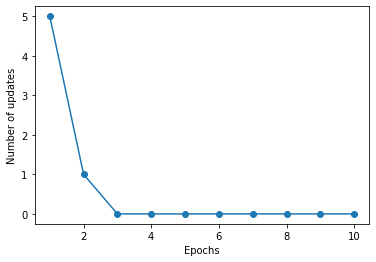

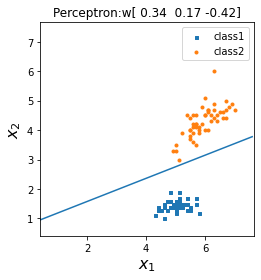

In [11]:
import joy
import matplotlib.pyplot as plt
%matplotlib inline
X, y=joy.iris_data()
ppn=joy.Perceptron(eta=0.01,epochs=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.cost_)+1), ppn.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()
joy.plot_xyw(X,y,ppn.w)

In [3]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [15]:
-0.5*0.58+0.7*0.54+(-0.2)*0.48

-0.00799999999999998

In [17]:
sigmoid(-0.01)

0.49750002083312506